### **Student Details**
Name: Vishal Pattar  
Roll no: 43556  
Class: BE AIML  
Subject: Deep Learning for AI  
Assignment: 3

### **Problem Statement:**

Build an Image Classification model by dividing the model into the following four stages:
- Loading and preprocessing the image data
- Defining the model’s architecture
- Training the model
- Estimating the model’s performance

Use a suitable dataset such as CIFAR-10 for implementation.

In [7]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

(60000, 28, 28)
0.0 1.0


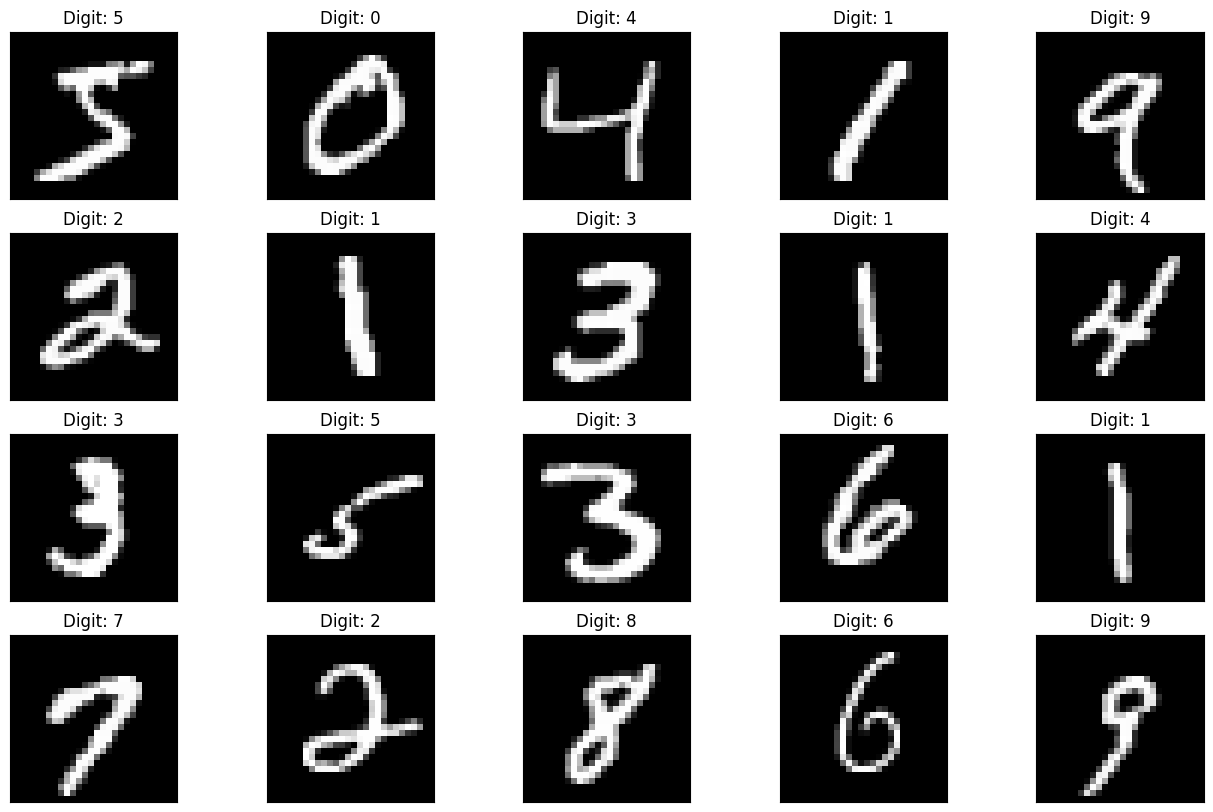

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [9]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the training data
print(X_train.shape)

# Normalize the pixel values of the images from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Verify the min and max values of the first training image
print(X_train[0].min(), X_train[0].max())

# Function to plot digits
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)  # Arrange images in a 4x5 grid
    plt.imshow(image, cmap='gray')  # Display image in grayscale
    plt.title(f"Digit: {digit}")  # Set title as the digit label
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

# Create a figure with a size of 16x10 inches
plt.figure(figsize=(16, 10))

# Plot the first 20 digits
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)

# Display the plot
plt.show()

# Reshape the data to add a channel dimension (for CNN input)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# Display the first 20 labels
print(y_train[0:20])


In [10]:
# Defining the model’s architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")  # Output layer for 10 classes (digits 0-9)
])

# Compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",  # For integer labels
    metrics=["accuracy"]
)

# Display the model architecture
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

1/1 [==============================] - 0s 90ms/step


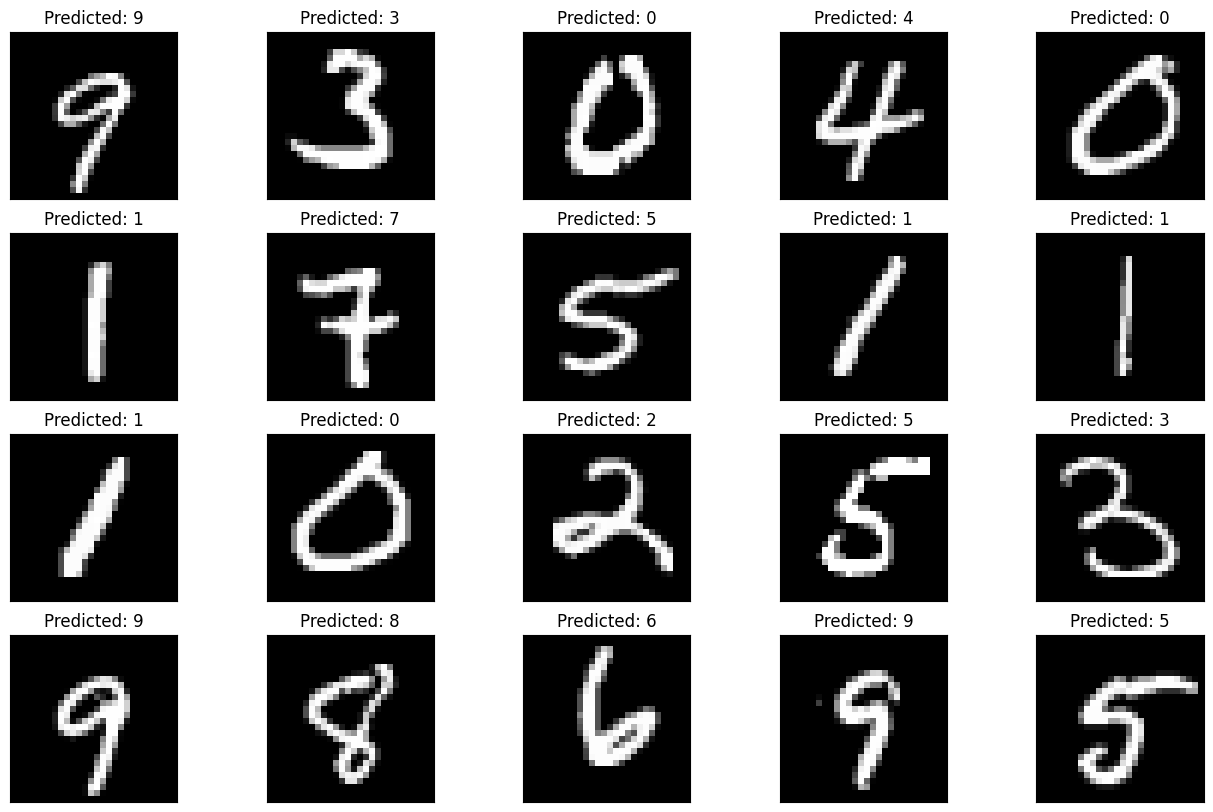

In [11]:
# Function to plot the digit
def plot_digit(image, digit, i):
    plt.subplot(4, 5, i + 1)  # 4x5 grid for 20 images
    plt.imshow(image, cmap='gray')  # Display image in grayscale
    plt.title(f"Predicted: {digit}")  # Display the predicted digit
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

# Plot 20 random test images with predictions
plt.figure(figsize=(16, 10))

for i in range(20):
    # Randomly select a test image index
    random_index = random.randint(0, X_test.shape[0] - 1)

    # Select the test image and remove the channel dimension for display
    image = X_test[random_index].squeeze()

    # Reshape the image for prediction
    pred = model.predict(X_test[random_index].reshape((1, 28, 28, 1)))

    # Get the predicted digit (argmax returns the index of the highest probability)
    digit = np.argmax(pred[0])

    # Plot the image and the predicted digit
    plot_digit(image, digit, i)

# Display the plot
plt.show()


313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9882


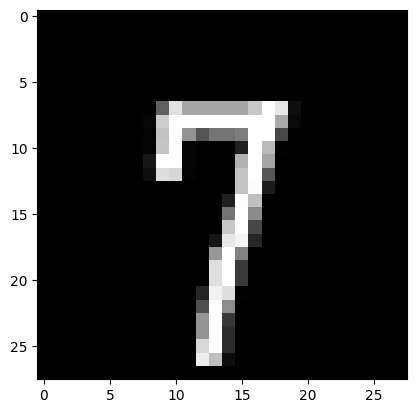

313/313 [==============================] - 2s 7ms/step
Handwritten number in the image is= 7
Test loss: 0.045222677290439606
Test accuracy: 0.9882000088691711


In [12]:
# Get predictions for the test set
predictions = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy using accuracy_score
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc:.4f}")

# Randomly select an image index from the test set
n = random.randint(0, len(X_test) - 1)

# Plot the randomly selected image
plt.imshow(X_test[n].squeeze(), cmap='gray')
plt.show()

# Get the predicted value for the selected image
predicted_value = model.predict(X_test)
print("Handwritten number in the image is= %d" % np.argmax(predicted_value[n]))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])  # Test loss
print('Test accuracy:', score[1])  # Test accuracy